In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from data_generators.standard_generator import StandardDataGenerator
from environments.contextual_environment import ContextualEnvironment
from learners.pricing.contextual_learner import ContextualLearner
from learners.pricing.thompson_sampling import ThompsonSampling
from learners.pricing.ucb import UCB
from utils.context_generator_v2 import ContextGenerator 

In [2]:
src = 'src/basic005.json'

In [3]:
dg = StandardDataGenerator(filename=src)

In [4]:
selected_bid = 3
T = 150
n_experiments = 1
learners_to_test = [ThompsonSampling]
cg_start_from = 50
cg_confidence = 0.01
cg_frequency = 10

features = dg.get_features() 
fractions = dg.get_class_distributions(selected_bid)
bandit_args = {
            'arm_values': dg.get_margins()
}
env_args = {
    'bid_idx': selected_bid,
    'mode': 'all',
    'src': dg.get_source(),
    'generator': 'standard'
}

In [5]:
rewards_per_experiment = {}
context_split_per_experiment = {}
days_of_split = {}
for learner in learners_to_test:
    rewards_per_experiment[learner.LEARNER_NAME] = []
    context_split_per_experiment[learner.LEARNER_NAME] = []
    days_of_split[learner.LEARNER_NAME] = []

In [6]:
for e in range(n_experiments):
    # Initialization of the learners to test and their related environment:
    # the list is composed of tuples (Learner, Environment)
    print(f'\n\nrunning experiment {e + 1}/{n_experiments}...')
    test_instances = []
    
    for learner in learners_to_test:
        context_learner = ContextualLearner(features, learner, **bandit_args)
        test_instances.append(
            (context_learner,
             ContextualEnvironment(**env_args),
             ContextGenerator(features=features,
                              contextual_learner=context_learner,
                              update_frequency=cg_frequency,
                              start_from=cg_start_from,
                              confidence=cg_confidence,
                              verbose=0))
        )
    for t in range(T):
        for context_learner, env, context_generator in test_instances:
            print(f'##### DAY {t} ######')
            context_learner.next_day()
            past_arms = None
            past_features = None
            month_purchases = env.get_next_purchases_at_day(t, keep=False)
            if month_purchases is not None:
                past_arms = env.get_selected_arms_at_day(t - 30, keep=False)
                past_features = env.get_collected_user_features_at_day(t - 30, keep=False)
                context_learner.update_next_purchases(past_arms, month_purchases, past_features)

            pulled_arms = context_learner.pull_arms()
            daily_rewards = env.day_round(pulled_arms)
            daily_users_features = env.get_collected_user_features_at_day(t)
            daily_pulled_arms = env.get_selected_arms_at_day(t)

            context_learner.update(daily_rewards, daily_pulled_arms, daily_users_features)
            context_generator.collect_daily_data(daily_pulled_arms, daily_rewards, daily_users_features,
                                                         next_purchases=month_purchases, past_pulled_arms=past_arms,
                                                         past_features=past_features)
    for learner, _, _ in test_instances:
        learner.next_day()
        rewards_per_experiment[learner.base_learner_class.LEARNER_NAME].append(learner.get_daily_rewards())
        context_split_per_experiment[learner.base_learner_class.LEARNER_NAME].append(learner.get_splits_count())
        days_of_split[learner.base_learner_class.LEARNER_NAME].append(context_generator.metadata['SPLIT_DAYS'])
    
    # end -> save rhe results.



running experiment 1/1...
##### DAY 0 ######
##### DAY 1 ######
##### DAY 2 ######
##### DAY 3 ######
##### DAY 4 ######
##### DAY 5 ######
##### DAY 6 ######
##### DAY 7 ######
##### DAY 8 ######
##### DAY 9 ######
##### DAY 10 ######
##### DAY 11 ######
##### DAY 12 ######
##### DAY 13 ######
##### DAY 14 ######
##### DAY 15 ######
##### DAY 16 ######
##### DAY 17 ######
##### DAY 18 ######
##### DAY 19 ######
##### DAY 20 ######
##### DAY 21 ######
##### DAY 22 ######
##### DAY 23 ######
##### DAY 24 ######
##### DAY 25 ######
##### DAY 26 ######
##### DAY 27 ######
##### DAY 28 ######
##### DAY 29 ######
##### DAY 30 ######
##### DAY 31 ######
##### DAY 32 ######
##### DAY 33 ######
##### DAY 34 ######
##### DAY 35 ######
##### DAY 36 ######
##### DAY 37 ######
##### DAY 38 ######
##### DAY 39 ######
##### DAY 40 ######
##### DAY 41 ######
##### DAY 42 ######
##### DAY 43 ######
##### DAY 44 ######
##### DAY 45 ######
##### DAY 46 ######
##### DAY 47 ######
##### DAY 48 ######
##

#92: [(True, False)] -> {'feature-1': True}
#93: [(True, True)] -> {'feature-1': True}
#94: [(False, False)] -> {'feature-1': False}
#95: [(True, True)] -> {'feature-1': True}
#96: [(True, True)] -> {'feature-1': True}
#97: [(True, True)] -> {'feature-1': True}
#98: [(False, False)] -> {'feature-1': False}
#99: [(False, True)] -> {'feature-1': False}
#100: [(True, True)] -> {'feature-1': True}
#101: [(True, True)] -> {'feature-1': True}
#102: [(True, True)] -> {'feature-1': True}
#103: [(True, True)] -> {'feature-1': True}
#104: [(False, True)] -> {'feature-1': False}
#105: [(False, False)] -> {'feature-1': False}
#106: [(False, False)] -> {'feature-1': False}
#107: [(False, False)] -> {'feature-1': False}
#108: [(False, True)] -> {'feature-1': False}
#109: [(False, False)] -> {'feature-1': False}
#110: [(False, True)] -> {'feature-1': False}
#111: [(False, True)] -> {'feature-1': False}
#112: [(False, True)] -> {'feature-1': False}
#113: [(False, True)] -> {'feature-1': False}
#114: [

#305: [(False, True)] -> {'feature-1': False}
#306: [(True, True)] -> {'feature-1': True}
#307: [(False, True)] -> {'feature-1': False}
#308: [(True, True)] -> {'feature-1': True}
#309: [(False, False)] -> {'feature-1': False}
#310: [(True, True)] -> {'feature-1': True}
#311: [(False, False)] -> {'feature-1': False}
#312: [(False, False)] -> {'feature-1': False}
#313: [(True, True)] -> {'feature-1': True}
#314: [(True, False)] -> {'feature-1': True}
#315: [(False, False)] -> {'feature-1': False}
#316: [(True, True)] -> {'feature-1': True}
#317: [(True, True)] -> {'feature-1': True}
#318: [(False, False)] -> {'feature-1': False}
#319: [(False, False)] -> {'feature-1': False}
#320: [(True, False)] -> {'feature-1': True}
#321: [(True, True)] -> {'feature-1': True}
#322: [(True, False)] -> {'feature-1': True}
#323: [(True, True)] -> {'feature-1': True}
#324: [(False, True)] -> {'feature-1': False}
#325: [(False, True)] -> {'feature-1': False}
#326: [(True, True)] -> {'feature-1': True}
#32

#20: [(True, True)] -> {'feature-1': True}
#21: [(False, True)] -> {'feature-1': False}
#22: [(False, False)] -> {'feature-1': False}
#23: [(False, False)] -> {'feature-1': False}
#24: [(False, True)] -> {'feature-1': False}
#25: [(False, True)] -> {'feature-1': False}
#26: [(True, False)] -> {'feature-1': True}
#27: [(False, True)] -> {'feature-1': False}
#28: [(True, False)] -> {'feature-1': True}
#29: [(True, True)] -> {'feature-1': True}
#30: [(False, False)] -> {'feature-1': False}
#31: [(True, True)] -> {'feature-1': True}
#32: [(False, False)] -> {'feature-1': False}
#33: [(True, True)] -> {'feature-1': True}
#34: [(True, False)] -> {'feature-1': True}
#35: [(True, True)] -> {'feature-1': True}
#36: [(True, True)] -> {'feature-1': True}
#37: [(True, False)] -> {'feature-1': True}
#38: [(True, True)] -> {'feature-1': True}
#39: [(False, False)] -> {'feature-1': False}
#40: [(False, False)] -> {'feature-1': False}
#41: [(True, False)] -> {'feature-1': True}
#42: [(True, True)] -> 

#298: [(True, True)] -> {'feature-1': True}
#299: [(False, False)] -> {'feature-1': False}
#300: [(False, False)] -> {'feature-1': False}
#301: [(True, True)] -> {'feature-1': True}
#302: [(False, False)] -> {'feature-1': False}
#303: [(True, True)] -> {'feature-1': True}
#304: [(True, False)] -> {'feature-1': True}
#305: [(False, False)] -> {'feature-1': False}
#306: [(False, False)] -> {'feature-1': False}
#307: [(True, True)] -> {'feature-1': True}
#308: [(True, True)] -> {'feature-1': True}
#309: [(True, True)] -> {'feature-1': True}
#310: [(True, False)] -> {'feature-1': True}
#311: [(False, False)] -> {'feature-1': False}
#312: [(True, True)] -> {'feature-1': True}
#313: [(False, False)] -> {'feature-1': False}
#314: [(False, False)] -> {'feature-1': False}
#315: [(False, True)] -> {'feature-1': False}
#316: [(True, False)] -> {'feature-1': True}
#317: [(True, False)] -> {'feature-1': True}
#318: [(True, False)] -> {'feature-1': True}
#319: [(True, True)] -> {'feature-1': True}
#

#0: [(True, True)] -> {'feature-1': True}
#1: [(True, True)] -> {'feature-1': True}
#2: [(False, False)] -> {'feature-1': False}
#3: [(False, False)] -> {'feature-1': False}
#4: [(False, False)] -> {'feature-1': False}
#5: [(True, True)] -> {'feature-1': True}
#6: [(True, True)] -> {'feature-1': True}
#7: [(True, True)] -> {'feature-1': True}
#8: [(False, False)] -> {'feature-1': False}
#9: [(False, False)] -> {'feature-1': False}
#10: [(True, True)] -> {'feature-1': True}
#11: [(True, True)] -> {'feature-1': True}
#12: [(True, True)] -> {'feature-1': True}
#13: [(False, False)] -> {'feature-1': False}
#14: [(False, False)] -> {'feature-1': False}
#15: [(True, True)] -> {'feature-1': True}
#16: [(False, False)] -> {'feature-1': False}
#17: [(True, True)] -> {'feature-1': True}
#18: [(True, False)] -> {'feature-1': True}
#19: [(False, False)] -> {'feature-1': False}
#20: [(False, False)] -> {'feature-1': False}
#21: [(True, True)] -> {'feature-1': True}
#22: [(True, True)] -> {'feature-

#0: [(False, True)] -> {'feature-1': False}
#1: [(False, False)] -> {'feature-1': False}
#2: [(False, False)] -> {'feature-1': False}
#3: [(False, False)] -> {'feature-1': False}
#4: [(True, True)] -> {'feature-1': True}
#5: [(False, False)] -> {'feature-1': False}
#6: [(True, True)] -> {'feature-1': True}
#7: [(False, True)] -> {'feature-1': False}
#8: [(False, False)] -> {'feature-1': False}
#9: [(True, False)] -> {'feature-1': True}
#10: [(True, True)] -> {'feature-1': True}
#11: [(True, True)] -> {'feature-1': True}
#12: [(True, True)] -> {'feature-1': True}
#13: [(True, True)] -> {'feature-1': True}
#14: [(True, True)] -> {'feature-1': True}
#15: [(True, True)] -> {'feature-1': True}
#16: [(False, True)] -> {'feature-1': False}
#17: [(False, True)] -> {'feature-1': False}
#18: [(True, False)] -> {'feature-1': True}
#19: [(False, True)] -> {'feature-1': False}
#20: [(True, False)] -> {'feature-1': True}
#21: [(False, False)] -> {'feature-1': False}
#22: [(False, False)] -> {'featur

#227: [(True, False)] -> {'feature-1': True}
#228: [(True, True)] -> {'feature-1': True}
#229: [(False, False)] -> {'feature-1': False}
#230: [(True, False)] -> {'feature-1': True}
#231: [(False, True)] -> {'feature-1': False}
#232: [(False, False)] -> {'feature-1': False}
#233: [(True, True)] -> {'feature-1': True}
#234: [(True, True)] -> {'feature-1': True}
#235: [(True, True)] -> {'feature-1': True}
#236: [(False, True)] -> {'feature-1': False}
#237: [(True, True)] -> {'feature-1': True}
#238: [(False, False)] -> {'feature-1': False}
#239: [(True, True)] -> {'feature-1': True}
#240: [(False, True)] -> {'feature-1': False}
#241: [(True, True)] -> {'feature-1': True}
#242: [(True, True)] -> {'feature-1': True}
#243: [(True, True)] -> {'feature-1': True}
#244: [(False, False)] -> {'feature-1': False}
#245: [(True, False)] -> {'feature-1': True}
#246: [(False, False)] -> {'feature-1': False}
#247: [(True, False)] -> {'feature-1': True}
#248: [(False, False)] -> {'feature-1': False}
#249

##### DAY 101 ######
#0: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#1: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#2: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#3: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#4: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#5: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#6: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#7: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#8: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#9: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#10: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#11: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#12: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#13: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#14: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#15: [(True, True)] -> {'fe

#98: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#99: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#100: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#101: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#102: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#103: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#104: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#105: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#106: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#107: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#108: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#109: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#110: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#111: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#112: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#113: [(True, False)] -> 

#71: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#72: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#73: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#74: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#75: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#76: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#77: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#78: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#79: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#80: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#81: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#82: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#83: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#84: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#85: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#86: [(False, False)] -> {'feature-1': False, 'feature

#19: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#20: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#21: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#22: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#23: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#24: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#25: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#26: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#27: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#28: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#29: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#30: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#31: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#32: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#33: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#34: [(False, False)] -> {'feature-1': False

#186: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#187: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#188: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#189: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#190: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#191: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#192: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#193: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#194: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#195: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#196: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#197: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#198: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#199: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#200: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#201: [(False, False)] -> {'featu

#245: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#246: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#247: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#248: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#249: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#250: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#251: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#252: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#253: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#254: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#255: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#256: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#257: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#258: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#259: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#260: [(False, False)] -> {'fea

#388: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#389: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#390: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#391: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#392: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#393: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#394: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#395: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#396: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#397: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#398: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#399: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#400: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#401: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#402: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#403: [(False, False)] ->

#0: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#1: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#2: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#3: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#4: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#5: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#6: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#7: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#8: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#9: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#10: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#11: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#12: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#13: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#14: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#15: [(True, True)] -> {'feature-1': True, 'featur

#0: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#1: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#2: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#3: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#4: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#5: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#6: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#7: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#8: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#9: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#10: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#11: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#12: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#13: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#14: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#15: [(False, False)] -> {'feature-1': False, 'fea

#175: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#176: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#177: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#178: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#179: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#180: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#181: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#182: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#183: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#184: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#185: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#186: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#187: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#188: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#189: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#190: [(False, False)] -> {'f

#156: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#157: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#158: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#159: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#160: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#161: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#162: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#163: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#164: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#165: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#166: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#167: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#168: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#169: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#170: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#171: [(False, False)] -> {'featu

#284: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#285: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#286: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#287: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#288: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#289: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#290: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#291: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#292: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#293: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#294: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#295: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#296: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#297: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#298: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#299: [(True, True)] -> {'feature-1':

#280: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#281: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#282: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#283: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#284: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#285: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#286: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#287: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#288: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#289: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#290: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#291: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#292: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#293: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#294: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#295: [(True, True)

#393: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#394: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#395: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#396: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#397: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#398: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#399: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#400: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#401: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#402: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#403: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#404: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#405: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#406: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#407: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#408: [(False, True)] -> 

##### DAY 117 ######
#0: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#1: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#2: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#3: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#4: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#5: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#6: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#7: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#8: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#9: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#10: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#11: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#12: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#13: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#14: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#15: [(True, False)] -> {'feature-1':

#0: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#1: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#2: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#3: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#4: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#5: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#6: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#7: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#8: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#9: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#10: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#11: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#12: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#13: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#14: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#15: [(True, True)] -> {'feature-1': True, 'feature-2': True}


#176: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#177: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#178: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#179: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#180: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#181: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#182: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#183: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#184: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#185: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#186: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#187: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#188: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#189: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#190: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#191: [(False, True)] -

#299: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#300: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#301: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#302: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#303: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#304: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#305: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#306: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#307: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#308: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#309: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#310: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#311: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#312: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#313: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#314: [(True, True)] -> {'feature-1':

#2: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#3: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#4: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#5: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#6: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#7: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#8: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#9: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#10: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#11: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#12: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#13: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#14: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#15: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#16: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#17: [(True, False)] -> {'feature-1': True, 'featu

#80: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#81: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#82: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#83: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#84: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#85: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#86: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#87: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#88: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#89: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#90: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#91: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#92: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#93: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#94: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#95: [(False, False)] -> {'feature-1': False, 

#259: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#260: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#261: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#262: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#263: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#264: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#265: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#266: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#267: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#268: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#269: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#270: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#271: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#272: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#273: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#274: [(True, True)] ->

#306: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#307: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#308: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#309: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#310: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#311: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#312: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#313: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#314: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#315: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#316: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#317: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#318: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#319: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#320: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#321: [(True, True)

#455: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#456: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#457: [(True, True)] -> {'feature-1': True, 'feature-2': True}
##### DAY 127 ######
#0: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#1: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#2: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#3: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#4: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#5: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#6: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#7: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#8: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#9: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#10: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#11: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#12: [(False, False)] -> {'feature-1

##### DAY 128 ######
#0: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#1: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#2: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#3: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#4: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#5: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#6: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#7: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#8: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#9: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#10: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#11: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#12: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#13: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#14: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#15: [(False, False)] -> {'feature-

#0: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#1: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#2: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#3: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#4: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#5: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#6: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#7: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#8: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#9: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#10: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#11: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#12: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#13: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#14: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#15: [(True, False)] -> {'feature-1': True, 'feature-2':

#66: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#67: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#68: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#69: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#70: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#71: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#72: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#73: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#74: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#75: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#76: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#77: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#78: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#79: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#80: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#81: [(True, False)] -> {'feature-1': True, 'f

#286: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#287: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#288: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#289: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#290: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#291: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#292: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#293: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#294: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#295: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#296: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#297: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#298: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#299: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#300: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#301: [(True, True)] -> {'feature-1

#400: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#401: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#402: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#403: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#404: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#405: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#406: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#407: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#408: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#409: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#410: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#411: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#412: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#413: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#414: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#415: [(True, False)] -> {'feat

#317: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#318: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#319: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#320: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#321: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#322: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#323: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#324: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#325: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#326: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#327: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#328: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#329: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#330: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#331: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#332: [(False, True)] -> {'feature-1'

#288: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#289: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#290: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#291: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#292: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#293: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#294: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#295: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#296: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#297: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#298: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#299: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#300: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#301: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#302: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#303: [(True, True)] ->

#369: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#370: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#371: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#372: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#373: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#374: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#375: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#376: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#377: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#378: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#379: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#380: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#381: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#382: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#383: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#384: [(False, False)] -> {'fea

#23: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#24: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#25: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#26: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#27: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#28: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#29: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#30: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#31: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#32: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#33: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#34: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#35: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#36: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#37: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#38: [(False, False)] -> {'feature-1': False, 'feature

#343: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#344: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#345: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#346: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#347: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#348: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#349: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#350: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#351: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#352: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#353: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#354: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#355: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#356: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#357: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#358: [(False, True)] -> {'feature-

#0: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#1: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#2: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#3: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#4: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#5: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#6: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#7: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#8: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#9: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#10: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#11: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#12: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#13: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#14: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#15: [(True, False)] -> {'feature-1': True, 'feature-2':

#407: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#408: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#409: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#410: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#411: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#412: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#413: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#414: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#415: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#416: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#417: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#418: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#419: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#420: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#421: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#422: [(True, True)] ->

#80: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#81: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#82: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#83: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#84: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#85: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#86: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#87: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#88: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#89: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#90: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#91: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#92: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#93: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#94: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#95: [(True, True)] -> {'feature-1': True,

#390: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#391: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#392: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#393: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#394: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#395: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#396: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#397: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#398: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#399: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#400: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#401: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#402: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#403: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#404: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#405: [(True, True)] -> {'featu

#355: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#356: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#357: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#358: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#359: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#360: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#361: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#362: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#363: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#364: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#365: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#366: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#367: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#368: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#369: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#370: [(True, True)] -> {'f

#0: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#1: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#2: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#3: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#4: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#5: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#6: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#7: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#8: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#9: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#10: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#11: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#12: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#13: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#14: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#15: [(True, True)] -> {'feature-1': True, 'feature-

#174: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#175: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#176: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#177: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#178: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#179: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#180: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#181: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#182: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#183: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#184: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#185: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#186: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#187: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#188: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#189: [(False, False)] -> {'fea

#200: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#201: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#202: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#203: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#204: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#205: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#206: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#207: [(True, False)] -> {'feature-1': True, 'feature-2': False}
#208: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#209: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#210: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#211: [(False, False)] -> {'feature-1': False, 'feature-2': False}
#212: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#213: [(True, True)] -> {'feature-1': True, 'feature-2': True}
#214: [(False, True)] -> {'feature-1': False, 'feature-2': True}
#215: [(True, True)] -> {'fea

In [7]:
margins = dg.get_margins()
classes = dg.get_classes()
conversion_rates = dg.get_conversion_rates(mode='all')
future_purchases = dg.get_future_purchases(mode='all')
selected_bid = 3
number_of_clicks = dg.get_daily_clicks(mode='all')
costs_per_click = dg.get_costs_per_click(mode='aggregate', bid=selected_bid)
fixed_cost = costs_per_click[selected_bid]
fixed_n_clicks = np.rint(dg.get_daily_clicks(mode='aggregate')[selected_bid]).astype(int)
fractions = dg.get_class_distributions(selected_bid)

temp = (margins * np.average(conversion_rates * (1 + future_purchases),
                             axis=0,
                             weights=fractions) - fixed_cost) * fixed_n_clicks
aggr_opt_arm = np.argmax(temp)
aggr_opt = np.max(temp)

disaggr_opt = 0
opt_arms = []
for i, _ in enumerate(conversion_rates):
    t = (margins * conversion_rates[i] * (1 + future_purchases[i]) - fixed_cost) * \
                number_of_clicks[i, selected_bid]
    opt_arm = np.argmax(t)
    opt_value = np.max(t)
    opt_arms.append(opt_arm)
    disaggr_opt += opt_value

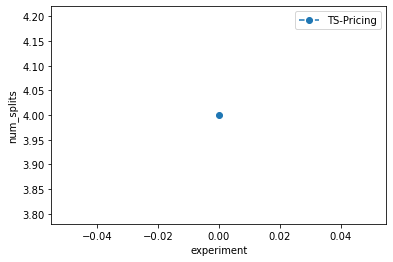

In [8]:
plt.figure()
plt.ylabel("num_splits")
plt.xlabel("experiment")
for val in context_split_per_experiment.values():
    plt.plot(val, '--o')
plt.legend(context_split_per_experiment.keys())
plt.show()

In [9]:
for key in context_split_per_experiment:
    print(f'{key}: avg splits -> {np.mean(context_split_per_experiment[key])}')

TS-Pricing: avg splits -> 4.0


In [10]:
val = days_of_split[ThompsonSampling.LEARNER_NAME]
avg_days = np.mean(val, axis=0)
val, avg_days

([[90, 100, 100]], array([ 90., 100., 100.]))

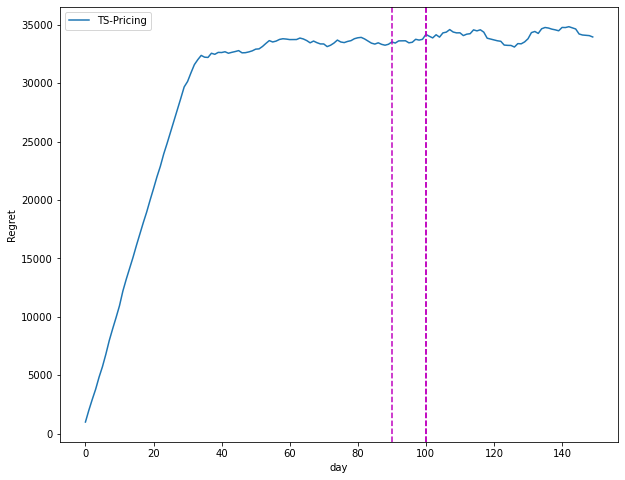

In [11]:
# Plotting the results
plt.figure(figsize=(10,8))
plt.ylabel("Regret")
plt.xlabel("day")
for val in rewards_per_experiment.values():
    plt.plot(np.cumsum(np.mean(disaggr_opt - val, axis=0)))

#plt.axvline(x=cg_start_from, color='r', linestyle='--')
for val in days_of_split.values():
    avg_days = np.mean(val, axis=0)
    for day in avg_days:
        plt.axvline(x=day, color='m', linestyle='--')

plt.legend(rewards_per_experiment.keys())
plt.show()

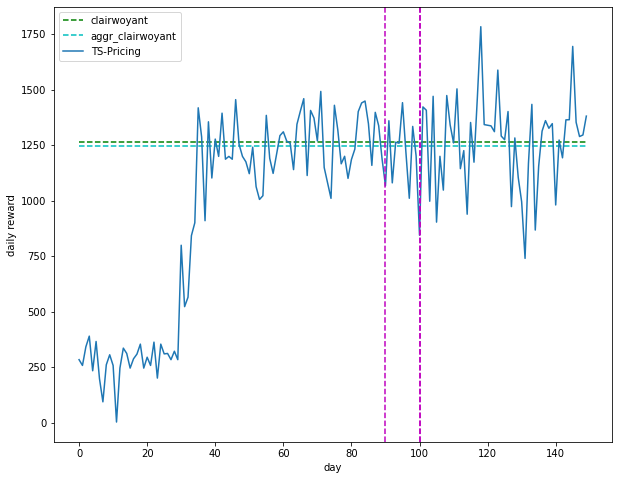

In [12]:
plt.figure(figsize=(10,8))
plt.xlabel("day")
plt.ylabel("daily reward")
plt.plot([disaggr_opt]*T, '--g', label='clairwoyant')
plt.plot([aggr_opt]*T, '--c', label='aggr_clairwoyant')
for key in rewards_per_experiment:
    plt.plot(np.mean(rewards_per_experiment[key], axis=0), label=key)

#plt.axvline(x=cg_start_from, color='r', linestyle='--')
for val in days_of_split.values():
    avg_days = np.mean(val, axis=0)
    for day in avg_days:
        plt.axvline(x=day, color='m', linestyle='--')

plt.legend(loc='best')
plt.show()